# Classification model using KNN

### 1. Import libraries

In [1]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_binary_200.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:202 ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,1,0.832239,1.233726,1.140988,2.165680,-1.597017,-0.743907,-0.071826,0.116781,-0.635038,...,0.077455,0.066486,2.200836,2.124988,-0.882250,0.367745,1.330217,0.660291,-0.899856,1.536773
1,1,-0.137469,-0.010969,0.843637,0.966030,0.409513,-0.847683,-1.006673,0.749325,-1.147702,...,-0.583738,-1.836914,1.908090,1.263731,-1.759173,-0.579072,1.043836,0.452179,0.771279,1.454416
2,1,-0.405876,0.109203,1.359791,1.225490,-0.138266,-1.679678,0.182724,-0.188638,-1.128553,...,0.342459,-0.801281,2.540216,0.933610,-1.590028,0.056035,1.889005,1.706726,0.912262,1.206671
3,0,-0.376180,0.196114,0.779141,1.123773,0.374653,-0.947631,-0.892223,0.621932,-0.999321,...,-0.272015,-2.344969,2.089854,1.595235,-1.722826,-0.317329,1.074202,0.198977,0.917910,1.435312
4,1,-1.964517,1.128601,-0.194799,-1.433777,-0.143446,-1.161713,-2.380596,0.026122,-1.105232,...,0.160001,-1.498763,2.403551,1.303866,-1.757287,0.949241,0.272723,2.771020,1.826682,1.859360


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:202] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.832239  1.233726  1.140988  2.165680 -1.597017 -0.743907 -0.071826   
1   -0.137469 -0.010969  0.843637  0.966030  0.409513 -0.847683 -1.006673   
2   -0.405876  0.109203  1.359791  1.225490 -0.138266 -1.679678  0.182724   
3   -0.376180  0.196114  0.779141  1.123773  0.374653 -0.947631 -0.892223   
4   -1.964517  1.128601 -0.194799 -1.433777 -0.143446 -1.161713 -2.380596   
..        ...       ...       ...       ...       ...       ...       ...   
176 -0.442013  0.276400  0.702629  0.145038  0.253912 -1.027387 -0.954011   
177  0.122423  0.435671  1.195094  1.099650 -0.651924 -1.125421 -0.957930   
178 -0.338142  0.528099  0.594873  0.742365 -0.105854 -1.069006 -0.974031   
179  0.151963  0.431527  0.093600  0.226152 -0.943175 -1.319361 -1.243683   
180 -0.074435  0.889761  1.095850  0.759461 -0.669753 -0.916490 -0.742355   

            7         8         9  ...       190       191       192  \
0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [5]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 6 and is: 0.5135


C:\Users\sandr\AppData\Local\Temp/ipykernel_14740/3738168230.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
C:\Users\sandr\AppData\Local\Temp/ipykernel_14740/3738168230.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(best_k, best_acuracy, 'ro', color ='g')


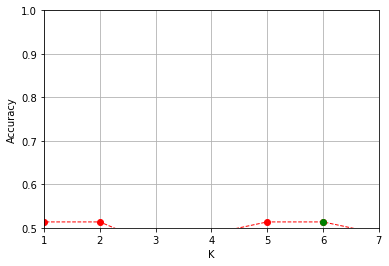

In [6]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [7]:
# Estudio de la mejor métrica
from sklearn import neighbors
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x0000025B931DD280>,
                     n_neighbors=6)

In [8]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
155,0,1,1
18,1,0,0
143,0,1,1
136,1,1,1
84,0,0,0


In [9]:
# Cross validation
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters: " +str(np.mean(result1)))
print("Best result of the cross validation of the model (mahattan) with the best paramters:: " +str(np.mean(result2)))


Best result of the cross validation of the model (euclidean) with the best paramters: 0.5982758620689654
Best result of the cross validation of the model (mahattan) with the best paramters:: 0.5982758620689654


#### 6.1. Manhattan model

In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0
yTrain=yTrain.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0
yTest=yTest.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [12]:
print('Final accuracy on the training dataset (manhattan): ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset (manhattan): ' + str(contTest/len(yTest)))

Final accuracy on the training dataset (manhattan): 0.6388888888888888
Final accuracy on the testing dataset (manhattan): 0.5405405405405406


In [13]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[57 11]
 [41 35]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1]


In [14]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.58      0.84      0.69        68
           1       0.76      0.46      0.57        76

    accuracy                           0.64       144
   macro avg       0.67      0.65      0.63       144
weighted avg       0.68      0.64      0.63       144



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[10  7]
 [10 10]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0]


In [16]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54        17
           1       0.59      0.50      0.54        20

    accuracy                           0.54        37
   macro avg       0.54      0.54      0.54        37
weighted avg       0.55      0.54      0.54        37

